# Oxides of Sulphur and Nitrogen in India (2016-2020)

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
df = pd.read_csv("Data Sets/Pre Corona Pandemic Datasets/Pollutant Data.csv")
df.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,543,Ahmedabad,2016-06-27,33.02,NaN,11.69,28.91,40.60,NaN,11.69,1.38,36.04,0.0,0.0,0.0,NaN,NaN
1,544,Ahmedabad,2016-06-28,27.29,NaN,9.81,28.12,37.93,NaN,9.81,1.61,39.26,0.0,0.0,0.0,272.0,Poor
2,545,Ahmedabad,2016-06-29,41.43,NaN,10.45,31.82,42.09,NaN,10.45,1.70,28.05,0.0,0.0,0.0,253.0,Poor
3,546,Ahmedabad,2016-06-30,30.16,NaN,10.41,15.99,26.40,NaN,10.41,1.60,23.76,0.0,0.0,0.0,256.0,Poor
4,547,Ahmedabad,2016-07-01,29.42,NaN,9.39,10.11,19.50,NaN,9.39,1.57,16.42,0.0,0.0,0.0,257.0,Poor


# Data Preprocessing.

In [3]:
df = df.drop(['Unnamed: 0','PM2.5','PM10','NH3','CO','O3','AQI','Benzene','Toluene','Xylene','AQI_Bucket','City'],axis=1)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.sort_values(by=['Date'],axis=0,inplace=True)
df

,Date,NO,NO2,NOx,SO2
3214,2016-01-01,13.80,51.73,34.31,7.44
7580,2016-01-01,86.62,94.04,131.36,23.57
9263,2016-01-01,12.11,15.10,14.49,25.52
11236,2016-01-01,11.17,17.35,26.85,8.56
6015,2016-01-01,5.86,32.92,32.56,0.94
...,...,...,...,...,...
3213,2020-05-01,20.20,14.31,29.83,7.04
2079,2020-05-01,1.33,5.60,4.07,27.10
1243,2020-05-01,11.58,0.03,15.19,5.91
20173,2020-05-01,75.87,11.84,65.66,7.86


In [6]:
df['Year'] = df['Date'].dt.to_period('M')
df = df.drop(['Date'],axis=1)
df

,NO,NO2,NOx,SO2,Year
3214,13.80,51.73,34.31,7.44,2016-01
7580,86.62,94.04,131.36,23.57,2016-01
9263,12.11,15.10,14.49,25.52,2016-01
11236,11.17,17.35,26.85,8.56,2016-01
6015,5.86,32.92,32.56,0.94,2016-01
...,...,...,...,...,...
3213,20.20,14.31,29.83,7.04,2020-05
2079,1.33,5.60,4.07,27.10,2020-05
1243,11.58,0.03,15.19,5.91,2020-05
20173,75.87,11.84,65.66,7.86,2020-05


# Group the values using groupby().

In [7]:
df = df.groupby(['Year']).sum()
df

,NO,NO2,NOx,SO2
Year,,,,
2016-01,6431.69,6702.20,11212.18,2035.90
2016-02,3814.41,5541.58,7543.98,1711.61
2016-03,3156.02,5741.58,6271.85,1718.27
2016-04,3117.15,6623.28,6342.19,2201.94
2016-05,1962.82,5261.54,5625.48,1558.97
2016-06,1697.56,3990.85,4656.38,1129.31
2016-07,3009.82,4542.82,8549.75,1465.58
2016-08,2475.97,3688.05,6941.69,1344.07
2016-09,2814.37,5974.67,5165.96,1649.19


# Perform Visualization to generate insights.

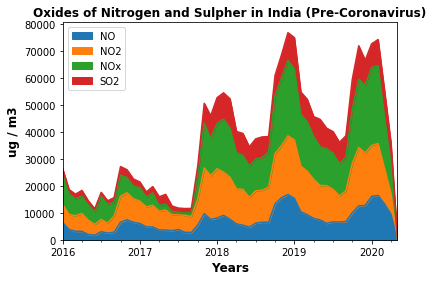

In [8]:
df.plot(kind='area')
mp.xlabel('Years',fontsize='large', fontweight='bold')
mp.ylabel('ug / m3',fontsize='large', fontweight='bold')
mp.title('Oxides of Nitrogen and Sulpher in India (Pre-Coronavirus)', fontsize='large', fontweight='bold')
mp.show()